# [E-01] rock_scissor_paper

In [1]:
from PIL import Image
import os, glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
def resize_images(image_path):
    """ 28*28 이미지 리사이즈 """
    print(image_path, "resizing...")
    #  glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다
    images = glob.glob(image_path+"/*.jpg")
    
    count = 0
    target_size = (28, 28)
    for img in images:
        old_image = Image.open(img)
        new_image = old_image.resize(target_size,Image.ANTIALIAS)
        new_image.save(img, "JPEG")
        count += 1
        
    print(count, "images resizied")

In [3]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    scissor = 0
    rock = 0
    paper = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        scissor=scissor+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
        rock=rock+1
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        paper=paper+1
        
    print("불러온 이미지 개수는", idx,"개 입니다.")
    print("scissor", scissor,"개,","rock", rock,"개,","paper", paper,"개")
    return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
# (x_train, y_train)=load_data(image_dir_path)
# x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

# print("x_train shape: {}".format(x_train.shape))
# print("y_train shape: {}".format(y_train.shape))

## 이미지 사이즈 변환

In [4]:
path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(path)
path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(path)
path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(path)

/aiffel/aiffel/rock_scissor_paper/scissor resizing...
100 images resizied
/aiffel/aiffel/rock_scissor_paper/rock resizing...
100 images resizied
/aiffel/aiffel/rock_scissor_paper/paper resizing...
100 images resizied


불러온 이미지 개수는 300 개 입니다.
scissor 100 개, rock 100 개, paper 100 개
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)
라벨:  2


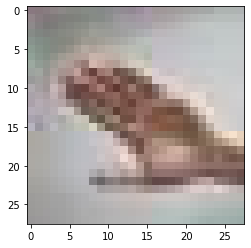

In [12]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

import matplotlib.pyplot as plt
plt.imshow(x_train[201])
print('라벨: ', y_train[201])

In [13]:


# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1 = 32
n_channel_2 = 64
n_dense = 128

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [14]:
n_train_epoch = 15

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/15
10/10 [==============================] - 0s 4ms/step - loss: 1.1385 - accuracy: 0.3773
Epoch 2/15
10/10 [==============================] - 0s 4ms/step - loss: 1.0605 - accuracy: 0.6068
Epoch 3/15
10/10 [==============================] - 0s 4ms/step - loss: 1.0341 - accuracy: 0.6858
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 0.9982 - accuracy: 0.5801
Epoch 5/15
10/10 [==============================] - 0s 4ms/step - loss: 0.8938 - accuracy: 0.6906
Epoch 6/15
10/10 [==============================] - 0s 4ms/step - loss: 0.7330 - accuracy: 0.7823
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.7229
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 0.5710 - accuracy: 0.7793
Epoch 9/15
10/10 [==============================] - 0s 4ms/step - loss: 0.4035 - accuracy: 0.9058
Epoch 10/15
10/10 [==============================] - 0s 4ms/step - loss: 0.3118 - accuracy: 0.9146
Epoch 11/15
10/10 [

/aiffel/aiffel/rock_scissor_paper/test/scissor resizing...
100 images resizied
/aiffel/aiffel/rock_scissor_paper/test/rock resizing...
100 images resizied
/aiffel/aiffel/rock_scissor_paper/test/paper resizing...
100 images resizied
불러온 이미지 개수는 300 개 입니다.
scissor 100 개, rock 100 개, paper 100 개
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)
라벨:  2


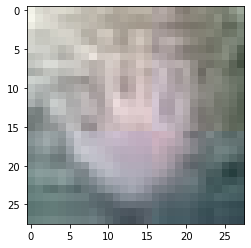

In [15]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

plt.imshow(x_test[201])
print('라벨: ', y_test[201])

In [16]:

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print('test_loss: {}'.format(test_loss))
print('test_accuracy: {}'.format(test_accuracy))

10/10 - 0s - loss: 0.1077 - accuracy: 0.9867
test_loss: 0.10765978693962097
test_accuracy: 0.9866666793823242
